# Codifica superdensa - *Superdense Coding*

È un protocollo che permette ad Alice di codificare due bit di informazione classica interagendo esclusivamente con uno tra due qubit di una coppia entangled condivisa con Bob. Alice interagirà con $q_1$, Bob con $q_0$.

### Circuito in Qiskit - Superdense Coding

In [17]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

import numpy as np
from BoredQiskit import FastQiskit as fq

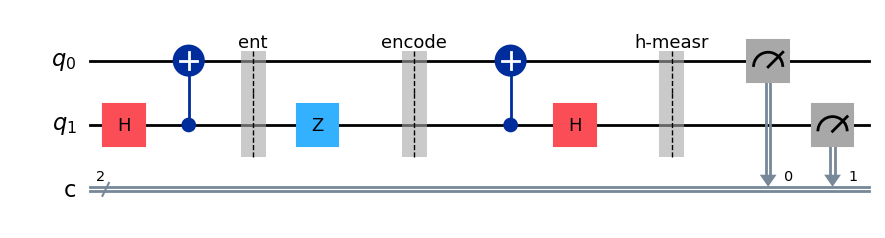

In [18]:
qc = QuantumCircuit(2,2)

bit_0 = 1
bit_1 = 0

qc.h(1)
qc.cx(1,0) # entanglement
qc.barrier(label="ent")

if bit_1:
    qc.x(1)
if bit_0: # codifica
    qc.z(1)
qc.barrier(label="encode")

qc.cx(1,0)
qc.h(1) # misurazione di Hadamard
qc.barrier(label="h-measr")


qc.measure(range(2),range(2)) # decodifica
qc.draw('mpl')


### Test su simulatore ideale

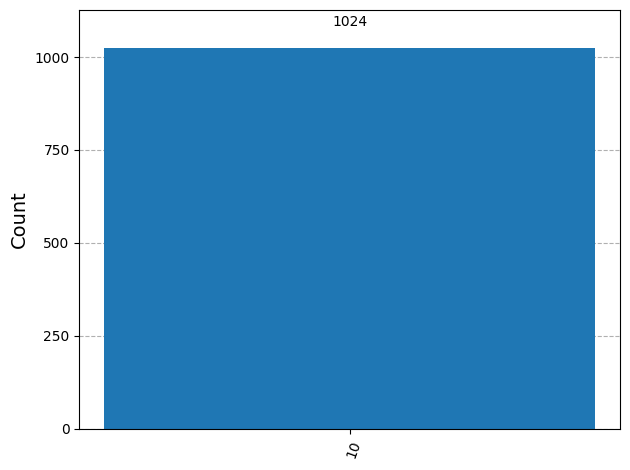

In [19]:
counts = fq.run(qc, 1024)
plot_histogram(counts)

### Test su hardware reale simulato

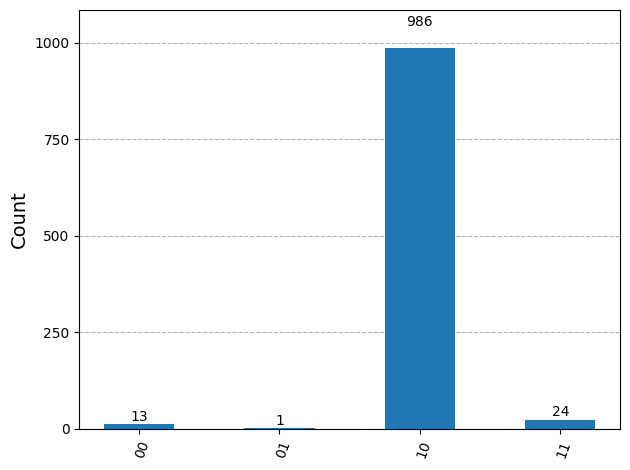

In [20]:
counts = fq.brisbane_run(qc, 1024)
plot_histogram(counts)

### Esperimenti con aggiunta di latenza su hardware FakeBrisbane

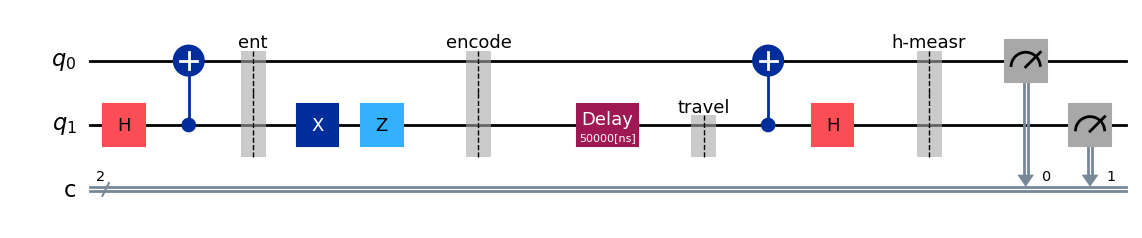

In [21]:
qc = QuantumCircuit(2,2)

bit_0 = 1
bit_1 = 1
time_in_ns = 50000

qc.h(1)
qc.cx(1,0) # entanglement
qc.barrier(label="ent")

if bit_1:
    qc.x(1)
if bit_0: # codifica
    qc.z(1)
qc.barrier(label="encode")

qc.delay(time_in_ns, 1, unit='ns')
qc.barrier(1, label="travel")

qc.cx(1,0)
qc.h(1) # misurazione di Hadamard
qc.barrier(label="h-measr")


qc.measure(range(2),range(2)) # decodifica
qc.draw('mpl')

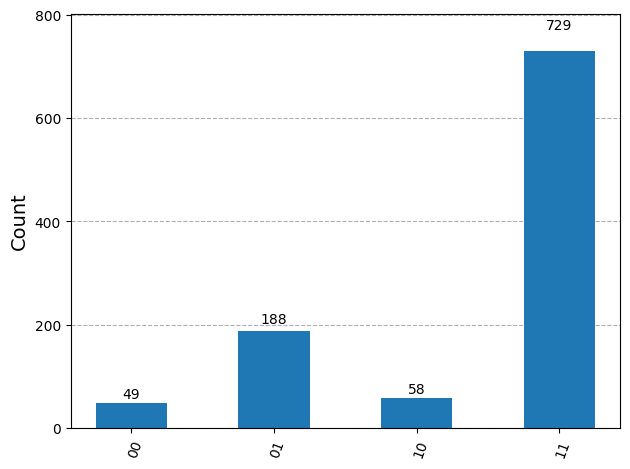

In [22]:
counts = fq.brisbane_run(qc, 1024)
plot_histogram(counts)